In [93]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

In [103]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[23:37]==x[27:41]:
            return x

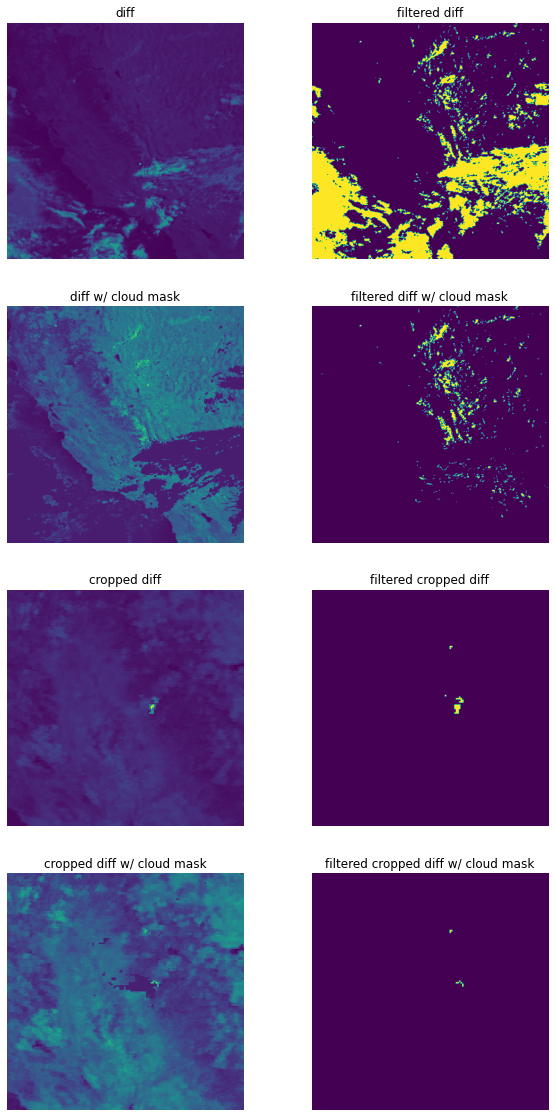

In [330]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'

CM = 'OR_ABI-L2-ACMC-M3_G17_s20183202302147_e20183202304520_c20183202305119.npy'
file07 = None
file14 = None
while file07 == None or file14 == None:
    file07 = find_npy_file(path, CM, '07')
    file14 = find_npy_file(path, CM, '14')
    
img07 = np.load(path + file07)
img14 = np.load(path + file14)
diff = img07 - img14
diffcm = diff.copy()
        
mask = np.load(pathCM + CM)
mask = mask.astype(bool)
diffcm[mask] = 0

fig, ax = plt.subplots(4, 2, figsize=(10, 20))

ax[0, 0].imshow(diff, aspect='equal')
ax[0, 0].set_title('diff')
ax[0, 0].axis('off')

ax[0, 1].imshow(diff>5, aspect='equal')
ax[0, 1].set_title('filtered diff')
ax[0, 1].axis('off')

ax[1, 0].imshow(diffcm, aspect='equal')
ax[1, 0].set_title('diff w/ cloud mask')
ax[1, 0].axis('off')

ax[1, 1].imshow(diffcm>5, aspect='equal')
ax[1, 1].set_title('filtered diff w/ cloud mask')
ax[1, 1].axis('off')

ax[2, 0].imshow(diff[50:200, 50:200], aspect='equal')
ax[2, 0].set_title('cropped diff')
ax[2, 0].axis('off')

ax[2, 1].imshow(diff[50:200, 50:200]>5, aspect='equal')
ax[2, 1].set_title('filtered cropped diff')
ax[2, 1].axis('off')

ax[3, 0].imshow(diffcm[50:200, 50:200], aspect='equal')
ax[3, 0].set_title('cropped diff w/ cloud mask')
ax[3, 0].axis('off')

ax[3, 1].imshow(diffcm[50:200, 50:200]>5, aspect='equal')
ax[3, 1].set_title('filtered cropped diff w/ cloud mask')
ax[3, 1].axis('off')

plt.axis('off')
plt.show()

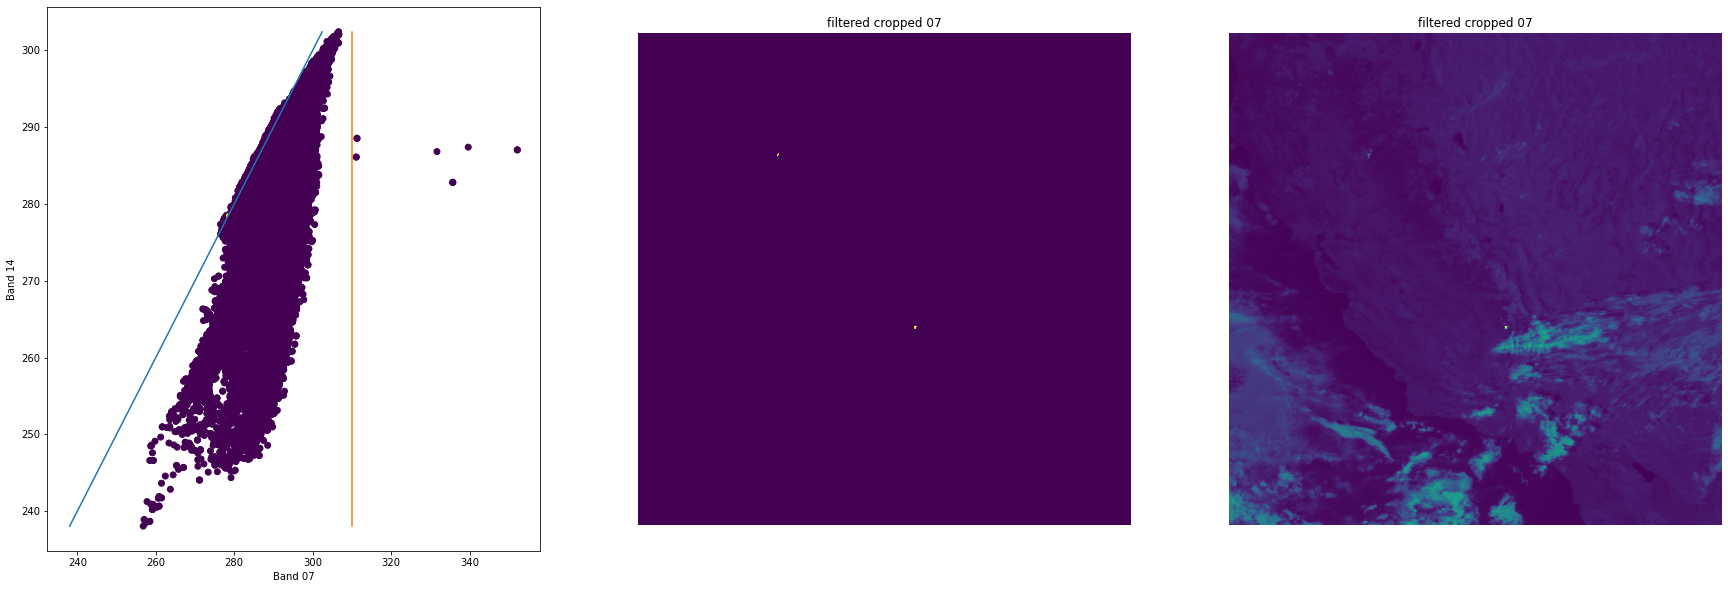

In [340]:
fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].scatter(img07, img14)
ax[0].plot([img14.min(), img14.max()], [img14.min(), img14.max()], label='x=y')
ax[0].plot([310, 310], [img14.min(), img14.max()], label='x=310')
ax[0].set_xlabel('Band 07')
ax[0].set_ylabel('Band 14')

ax[1].imshow(img07>310, aspect='equal')
ax[1].set_title('filtered cropped 07')
ax[1].axis('off')

ax[2].imshow(diff, aspect='equal')
ax[2].set_title('diff')
ax[2].axis('off')

plt.show()

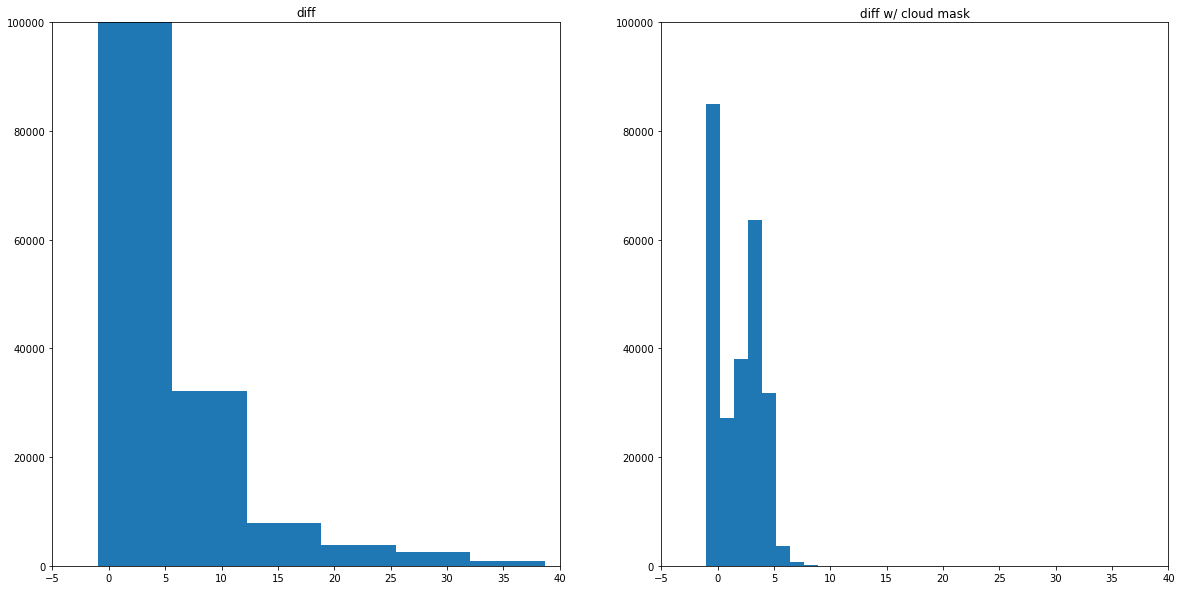

In [341]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].hist(diff.ravel())
ax[0].set_title('diff')

ax[1].hist(diffcm.ravel())
ax[1].set_title('diff w/ cloud mask')

plt.setp(ax, xlim=(-5, 40), ylim=(0, 100000))
plt.show()

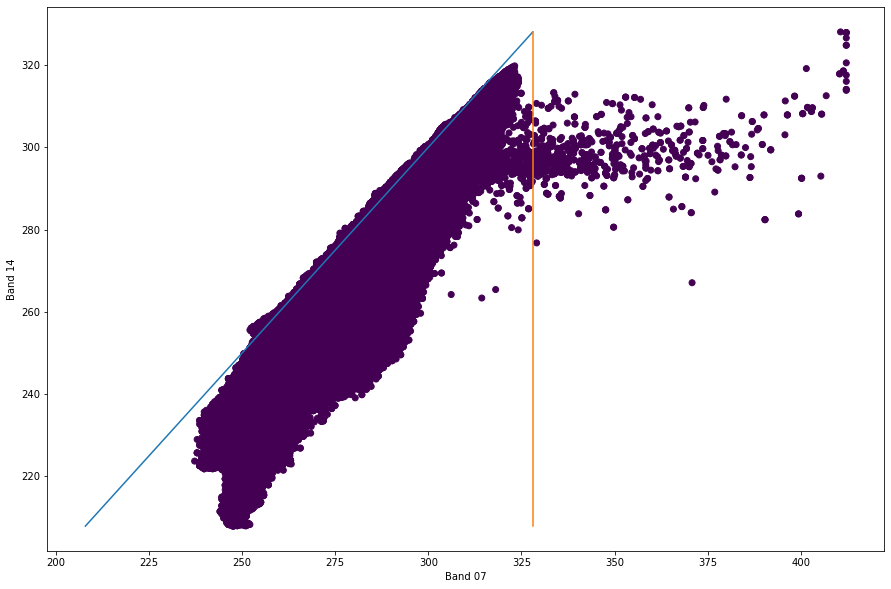

In [377]:
colors = np.zeros((500, 500))
plt.figure(figsize=(15, 10))

for n in range(10):
    CM = random.choice(os.listdir(pathCM))
    file07 = None
    file14 = None
    while file07 == None or file14 == None:
        file07 = find_npy_file(path, CM, '07')
        file14 = find_npy_file(path, CM, '14')
    
    img07 = np.load(path + file07)
    img14 = np.load(path + file14)
    
    if n==0:
        total = img14
    else:
        total = np.concatenate((total, img14))
    
    plt.scatter(img07, img14, c=colors)
    colors += 50
    
plt.plot([total.min(), total.max()], [total.min(), total.max()], label='x=y')
plt.plot([total.max(), total.max()], [total.min(), total.max()], label='14 max')
plt.xlabel('Band 07')
plt.ylabel('Band 14')
plt.show()

In [212]:
path = '../../GOES_Files/npy_files/'
pathCM = '../../GOES_Files/clear_sky_mask/'
data = []
dataCM = []

files = os.listdir(pathCM)

In [213]:
CM = random.choice(files)
print(CM)

OR_ABI-L2-ACMC-M6_G17_s20202832316176_e20202832318549_c20202832319216.npy


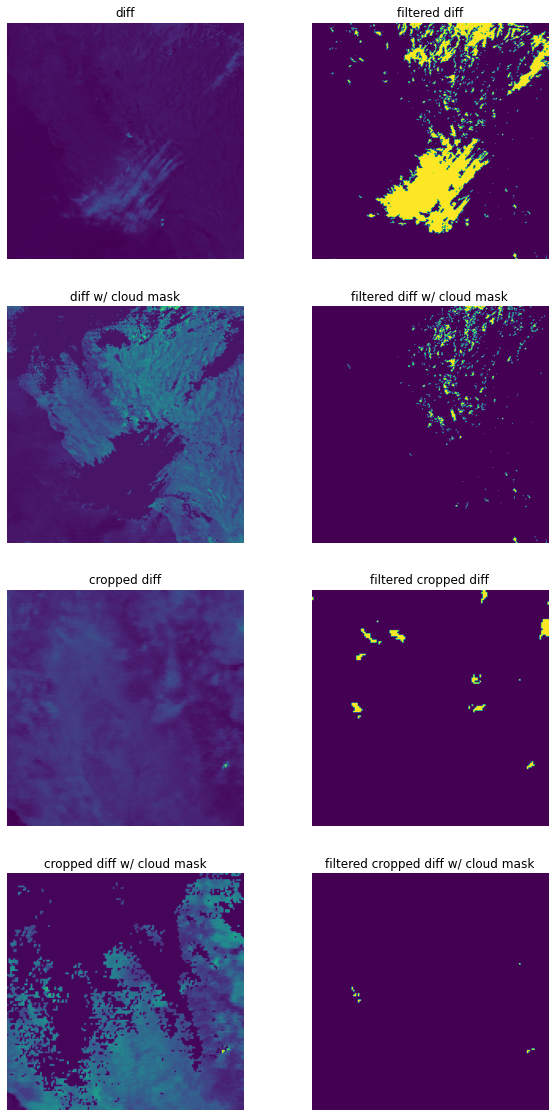

In [214]:
CM = random.choice(os.listdir(pathCM))
file07 = None
file14 = None
while file07 == None or file14 == None:
    file07 = find_npy_file(path, CM, '07')
    file14 = find_npy_file(path, CM, '14')
    
img07 = np.load(path + file07)
img14 = np.load(path + file14)
diff = img07 - img14
diffcm = diff.copy()
        
mask = np.load(pathCM + CM)
mask = mask.astype(bool)
diffcm[mask] = 0

fig, ax = plt.subplots(4, 2, figsize=(10, 20))

ax[0, 0].imshow(diff, aspect='equal')
ax[0, 0].set_title('diff')
ax[0, 0].axis('off')

ax[0, 1].imshow(diff>5, aspect='equal')
ax[0, 1].set_title('filtered diff')
ax[0, 1].axis('off')

ax[1, 0].imshow(diffcm, aspect='equal')
ax[1, 0].set_title('diff w/ cloud mask')
ax[1, 0].axis('off')

ax[1, 1].imshow(diffcm>5, aspect='equal')
ax[1, 1].set_title('filtered diff w/ cloud mask')
ax[1, 1].axis('off')

ax[2, 0].imshow(diff[50:200, 50:200], aspect='equal')
ax[2, 0].set_title('cropped diff')
ax[2, 0].axis('off')

ax[2, 1].imshow(diff[50:200, 50:200]>5, aspect='equal')
ax[2, 1].set_title('filtered cropped diff')
ax[2, 1].axis('off')

ax[3, 0].imshow(diffcm[50:200, 50:200], aspect='equal')
ax[3, 0].set_title('cropped diff w/ cloud mask')
ax[3, 0].axis('off')

ax[3, 1].imshow(diffcm[50:200, 50:200]>5, aspect='equal')
ax[3, 1].set_title('filtered cropped diff w/ cloud mask')
ax[3, 1].axis('off')

plt.axis('off')
plt.show()